# Plan for Python work

1) My _suggestion_ is to proceed as before and work through the notebook , switching every 5 or so minutes, discussing in each cell what the lines mean.  You may do something differently if you both agree. 

2) I provide a number of commands below (and prompts) , some of the things you need to figure out yourself and some of the tasks I have completed for you 

3) Make sure you understand how much time you have (ask me if you don't know) and plan accordingly. There is a lot of infromation in here!

4) Plenty of suggestions at the bottom for more things to try - you should take a look and make sure you can do all of these things... 

In [18]:
#A bunch of libraries and packages 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen

from sklearn import linear_model
from pandas.tools.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
%matplotlib inline

In [2]:
# UCI ML database - energy efficiency
# Database of many ML data available here: https://archive.ics.uci.edu/ml/

#what the heck is this doing? 
socket = urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx')
UCI_energy=pd.read_excel(socket)

# definition of dataframes 
# X1	Relative Compactness 
# X2	Surface Area 
# X3	Wall Area 
# X4	Roof Area 
# X5	Overall Height 
# X6	Orientation 
# X7	Glazing Area 
# X8	Glazing Area Distribution 
# y1	Heating Load 
# y2	Cooling Load

In [3]:
# This is a naive validation set approach. Please understand and briefly discuss this is just for teaching
# What would you do in the real world based on our bootstrap/resampling lessons? 
train,test = train_test_split(UCI_energy,test_size=0.2,random_state=1010)
train_X = train[['X1','X2','X3','X4','X5','X6','X7','X8']]
train_Y = train[['Y1']]
test_X = test[['X1','X2','X3','X4','X5','X6','X7','X8']]
test_Y = test[['Y1']]

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

mse_list_train = []
for i in range (1,20):
    dtr = DecisionTreeRegressor(max_depth = i)
    dtr.fit(train_X,train_Y)
    predict_train = dtr.predict(test_X)
    err = mean_squared_error(test_Y, predict_train)
    mse_list.append(err)

mse_list_test = []
for j in range (1,20):
    dtr2 = DecisionTreeRegressor(max_depth = j)
    dtr2.fit(test_X, test_Y)
    predict_test = dtr2.predict(test_X)
    err = mean_squared_error(test_Y, predict_test)
    mse_list_test.append(err)

ValueError: x and y must have same first dimension, but have shapes (19,) and (0,)

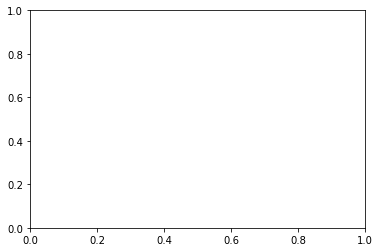

In [33]:


DT_depth = range(1,20)
plt.plot(DT_depth,mse_list_train)
plt.plot(DT_depth,mse_list_test)
plt.plot

# Part 1: Multiple linear regression on X1-X2 predicting Y1 

Train error 8.14899273898
Test error 9.99737187037


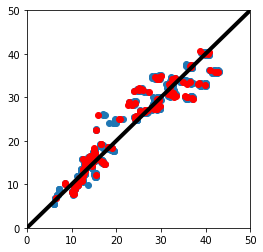

In [28]:
# train linear model 
MLR=linear_model.LinearRegression()
MLR.fit(train[['X1','X2','X3','X4','X5','X6','X7','X8']],train.Y1)

# make predictions on test and train set 
trainpred=MLR.predict(train[['X1','X2','X3','X4','X5','X6','X7','X8']])
testpred=MLR.predict(test[['X1','X2','X3','X4','X5','X6','X7','X8']])

#make parity plot 
plt.figure(figsize=(4,4))
plt.xlim([0,50]);
plt.ylim([0,50]);
plt.scatter(train.Y1,trainpred)
plt.scatter(test.Y1,testpred,color='r')
plt.plot([0,50],[0,50],lw=4,color='black')

#calculate the test and train error
print("Train error",mean_squared_error(train.Y1,trainpred))
print("Test error",mean_squared_error(test.Y1,testpred))

# Part 2: Ridge Regression 

* The Ridge coefficients minimize $RSS + \lambda \sum_{j=1}^{p}\beta_j^2$
    * There is an additional **penalty** in error for having nonzero coefficients!
* Note: Eq 6.5 in ISLR shows the tuning parameter as $\lambda$, it is $\alpha$ in SKLearn
* Goal here: train models as a function of the regularization parameter 
* The X's should be normalized as in Eq 6.6, there is a normalization feature, but we will do it manually using $x_{ij}=\frac{x_{ij}}{s_j}$
    * I suggest on your own you test out what normalization in Ridge does
    * Some methods in sklearn also do automatic selection of shrinkage coefficient! Cool! 

In [6]:
#normalized data for Ridge / LASSO 
train_normalized=train/train.std()
test_normalized=test/test.std()
train_normalized

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
136,6.034494,8.869363,7.888034,4.890715,1.998890,1.794442,0.745488,1.288066,1.522136,2.016743
161,7.448828,7.206357,7.888034,3.260476,3.997781,2.691663,0.745488,1.932099,3.504567,4.322941
569,6.034494,8.869363,7.888034,4.890715,1.998890,2.691663,2.981954,0.644033,1.912300,2.383805
671,5.845916,9.146530,8.451465,4.890715,1.998890,4.486105,2.981954,1.932099,1.653508,1.677997
105,8.108851,6.652022,6.761172,3.260476,3.997781,2.691663,0.745488,1.288066,2.668923,2.687942
532,8.486007,6.374855,7.324603,2.717064,3.997781,1.794442,2.981954,0.644033,3.602355,4.119483
132,6.223072,8.592195,7.324603,4.890715,1.998890,1.794442,0.745488,1.288066,1.130983,1.558440
547,7.448828,7.206357,7.888034,3.260476,3.997781,4.486105,2.981954,0.644033,4.115989,4.922825
33,6.505939,8.315028,6.761172,4.890715,1.998890,2.691663,0.000000,0.000000,0.670688,1.263742
679,8.486007,6.374855,7.324603,2.717064,3.997781,4.486105,2.981954,2.576132,3.612232,3.785981


## 2-1 Example of single instance of RR


In [7]:
heat_ridge=Ridge()
a=1e0
heat_ridge.set_params(alpha=a)
heat_ridge.fit(train_normalized[['X1','X2','X3','X4','X5','X6','X7','X8']],train_normalized.Y1)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [8]:
print (mean_squared_error(train_normalized.Y1,heat_ridge.predict(
        train_normalized[['X1','X2','X3','X4','X5','X6','X7','X8']])))

print (mean_squared_error(test_normalized.Y1,heat_ridge.predict(
        test_normalized[['X1','X2','X3','X4','X5','X6','X7','X8']])))

0.0796850980174
0.107416746319


## 2-2 Example of searching the $\alpha$ space in RR

In [9]:
# RR vs lambda (based on sklearn tutorial)
coefs = []
trainerror = []
testerror = []

# do you know what is happening here? 
lambdas = np.logspace(-6,6,200)
model=Ridge()

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l)
    model.fit(train_normalized[['X1','X2','X3','X4','X5','X6','X7','X8']],train_normalized.Y1)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(train_normalized.Y1,model.predict(
        train_normalized[['X1','X2','X3','X4','X5','X6','X7','X8']])))
    testerror.append(mean_squared_error(test_normalized.Y1,model.predict(
        test_normalized[['X1','X2','X3','X4','X5','X6','X7','X8']])))

    

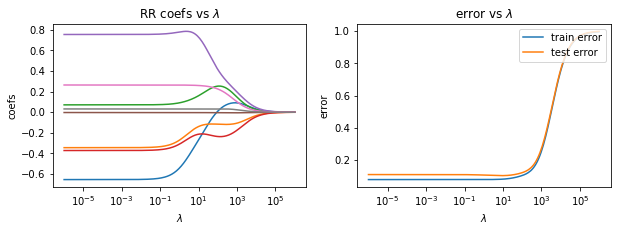

In [10]:
# what is being plotted here? 
plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('RR coefs vs $\lambda$')
plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(loc=1)
plt.title('error vs $\lambda$')


### RR questions 

1) Explain to each other what is happening in these two plots   
2) Why does the blue curve have a minimum at the smallest $\lambda4 value? 

# Part 3: LASSO regression 

* The lasso improves over ridge by also providing a variable selection tool!
* The lasso minimizer is $RSS + \lambda \sum_{j=1}^{p}\lvert\beta_j\rvert$

In [11]:
# also based on sklearn tutorials
# what the hell is happening in this cell?
coefs = []
trainerror = []
testerror = []

lambdas = np.logspace(-6,6,200)
model=linear_model.Lasso()

# loop over lambda values (strength of regularization)
for l in lambdas:
    model.set_params(alpha=l,max_iter=1e6)
    model.fit(train_normalized[['X1','X2','X3','X4','X5','X6','X7','X8']],train_normalized.Y1)
    coefs.append(model.coef_)
    trainerror.append(mean_squared_error(train_normalized.Y1,model.predict(
        train_normalized[['X1','X2','X3','X4','X5','X6','X7','X8']])))
    testerror.append(mean_squared_error(test_normalized.Y1,model.predict(
        test_normalized[['X1','X2','X3','X4','X5','X6','X7','X8']])))



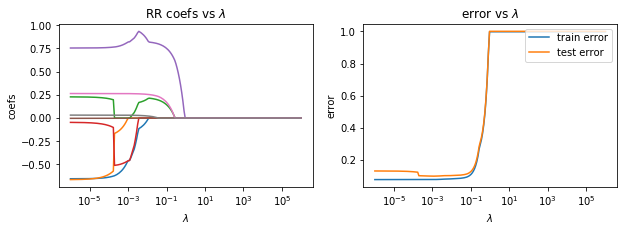

In [12]:
plt.figure(figsize=(10,3))
#plt.locator_params(nbins=5)
plt.subplot(121)
plt.plot(lambdas,coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('coefs')
plt.title('RR coefs vs $\lambda$')
#plt.xlim(1e-4,1e0)

plt.subplot(122)
plt.plot(lambdas,trainerror,label='train error')
plt.plot(lambdas,testerror,label='test error')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
#plt.xlim(1e-4,1e0)
#plt.ylim(0,0.5)
plt.legend(loc=1)
plt.title('error vs $\lambda$')

### Other things to consider if you have more time 

* Note we did not scale the features in the MLR, try it out and verify the final error doesnt' change!
* Make sure you undersand how to make _predictions_ with supervised learning models that are trained on scaled/normalized data
* Plot the residuals and verify if errors are distributed normally
* Make a parity plot including the predictions from ridge and LASSO 
* Compare errors between all three 
* Explore the effect of training/testing split 
* Look at the shrinkage/regularization situation when predicting Y2 vs Y1... 
